In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# import formula api as alias smf
import statsmodels.formula.api as smf

%matplotlib inline
import matplotlib.pyplot as plt

df_loans = pd.read_csv('loansData_clean.csv')

df_loans.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,FICO.Score
0,20000,20000,0.0890,36,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14,14272,2,< 1 year,735
1,19200,19200,0.1212,36,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12,11140,1,2 years,715
2,35000,35000,0.2198,60,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14,21977,1,2 years,690
3,10000,9975,0.0999,36,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10,9346,0,5 years,695
4,12000,12000,0.1171,36,credit_card,18.78%,NJ,RENT,3195.00,695-699,11,14469,0,9 years,695


In [6]:
df_loans['annual_inc'] = df_loans['Monthly.Income'].map(lambda val: val*12)
df_loans.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,FICO.Score,annual_inc
0,20000,20000,0.0890,36,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14,14272,2,< 1 year,735,78500.04
1,19200,19200,0.1212,36,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12,11140,1,2 years,715,54999.96
2,35000,35000,0.2198,60,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14,21977,1,2 years,690,138000.00
3,10000,9975,0.0999,36,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10,9346,0,5 years,695,45999.96
4,12000,12000,0.1171,36,credit_card,18.78%,NJ,RENT,3195.00,695-699,11,14469,0,9 years,695,38340.00


In [3]:
df_loans.shape

(2500, 16)

In [7]:
df_loans['int_rate'] = df_loans['Interest.Rate']

# import formula api as alias smf
import statsmodels.formula.api as smf

# formula: response ~ predictor + predictor
est = smf.ols(formula='int_rate ~ annual_inc', data=df_loans).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               int_rate   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3764
Date:                Sun, 10 Apr 2016   Prob (F-statistic):              0.540
Time:                        21:18:46   Log-Likelihood:                 4390.2
No. Observations:                2499   AIC:                            -8776.
Df Residuals:                    2497   BIC:                            -8765.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.1300      0.001     88.868      0.000         0.127     0.133
annual_inc  1.078e-08   1.76e-08      0.614      0.540     -2.37e-08  4.53e-08
==============================================================================
Omnibus:                       69.811   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.205
Skew:                           0.274   Prob(JB):                     1.70e-12
Kurtosis:                       2.531   Cond. No.                     1.46e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

AttributeError: 'DataFrame' object has no attribute 'design_info'

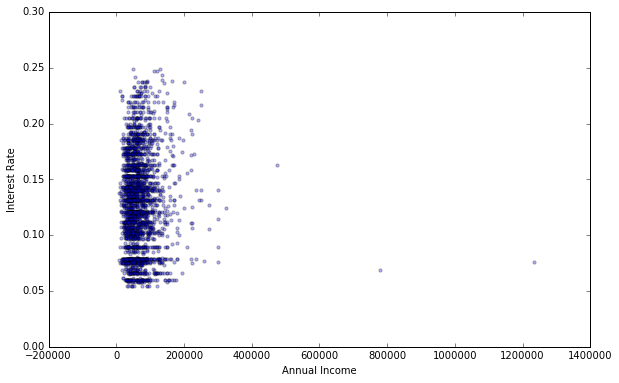

In [14]:
# plot Interest.Rate against Annual.Income
plt.figure(figsize=(6 * 1.618, 6))
plt.scatter(df_loans.annual_inc, df_loans.int_rate, s=10, alpha=0.3)
plt.xlabel('Annual Income')
plt.ylabel('Interest Rate')

# points linearlyd space on lstats
x = pd.DataFrame({'annual_inc': np.linspace(df_loans.annual_inc.min(), df_loans.annual_inc.max(), 100)})

# 1-st order polynomial
poly_1 = smf.ols(formula='int_rate ~ 1 + annual_inc', data=df_loans).fit()
plt.plot(x.annual_inc, poly_1.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % poly_1.rsquared, 
         alpha=0.9)